In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv("../datasets/Penguins.csv")
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [7]:
df = df.drop(columns=["Unnamed: 0", "sex", "year"])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0


In [8]:
# Drop rows that contains NaN value
df = df.dropna()
df

BILLLENGTH = "bill_length_mm"
BILLDEPTH = "bill_depth_mm"
FLIPERLENGTH = "flipper_length_mm"
BODYMASS = "body_mass_g"

Tor = df[df["island"] == "Torgersen"]
Bi = df[df["island"] == "Biscoe"]
Dr = df[df["island"] == "Dream"]

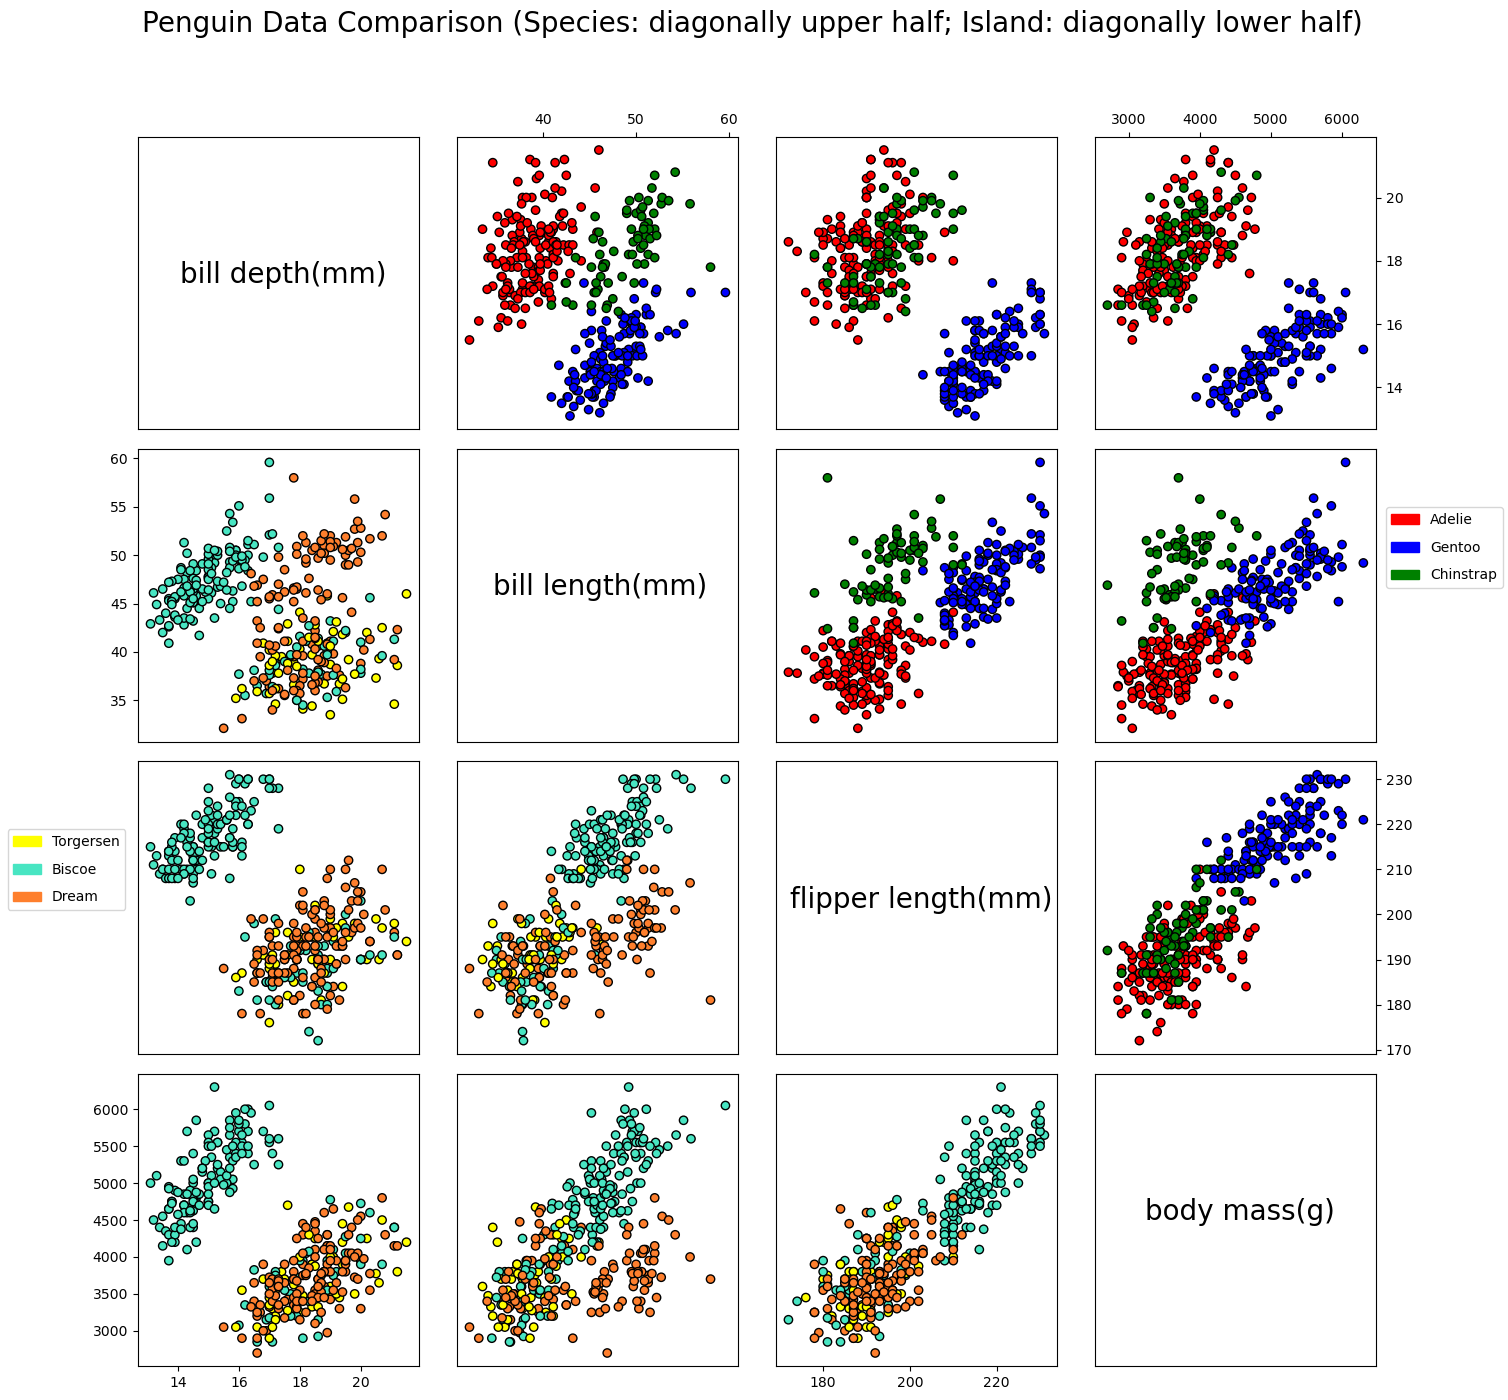

In [9]:
def setTitle(ax,name):
    ax.set_title(f'{name}')
    

plt.figure(figsize=(15, 15))
nrows, ncols = 4, 4
species_c = np.where(df["species"]=="Adelie",'red', np.where(df["species"]=="Gentoo", "blue", "green"))
island_c = np.where(df["island"]=="Torgersen",'yellow', np.where(df["island"]=="Biscoe", "#48e5c2", "#fe7f2d"))

# x bill_length_mm y bill_depth_mm based on species
ax01 = plt.subplot(nrows, ncols, 2)
#c = np.where(df["species"]=="Adelie",'red', np.where(df["species"]=="Gentoo", "blue", "green"))
ax01.scatter(x=df[BILLLENGTH], y=df[BILLDEPTH], c=species_c, edgecolors='black')

# y bill_length_mm x bill_depth_mm based on islands
ax10 = plt.subplot(nrows, ncols, 5)
ax10.scatter(x=df[BILLDEPTH], y=df[BILLLENGTH], c=island_c, edgecolors='black')


# x flipper_length_mm y bill_depth_mm based on species
ax02 = plt.subplot(nrows, ncols, 3, sharey=ax01)
ax02.scatter(x=df[FLIPERLENGTH], y=df[BILLDEPTH], c=species_c, edgecolors='black')

# y flipper_length_mm x bill_depth_mm based on islands
ax20 = plt.subplot(nrows, ncols, 9, sharex=ax10)
ax20.scatter(x=df[BILLDEPTH], y=df[FLIPERLENGTH], c=island_c, edgecolors='black')

# x body_mass_g y bill_depth_mm based on species
ax03 = plt.subplot(nrows, ncols, 4, sharey=ax01)
ax03.scatter(x=df[BODYMASS], y=df[BILLDEPTH], c=species_c, edgecolors='black')

# y body_mass_g x bill_depth_mm based on locations
ax30 = plt.subplot(nrows, ncols, 13, sharex=ax20)
ax30.scatter(x=df[BILLDEPTH], y=df[BODYMASS], c=island_c, edgecolors='black')

# x flipper_length_mm y bill_length_mm based on species
ax12 = plt.subplot(nrows, ncols, 7, sharex=ax02, sharey=ax10)
ax12.scatter(x=df[FLIPERLENGTH], y=df[BILLLENGTH], c=species_c, edgecolors='black')

# y flipper_length_mm x bill_length_mm based on locations
ax21 = plt.subplot(nrows, ncols, 10, sharex=ax01, sharey=ax20)
ax21.scatter(x=df[BILLLENGTH], y=df[FLIPERLENGTH], c=island_c, edgecolors='black')


# x body_mass_g y bill_depth_mm based on species
ax13 = plt.subplot(nrows, ncols, 8, sharex=ax03, sharey=ax10)
ax13.scatter(x=df[BODYMASS], y=df[BILLLENGTH], c=species_c, edgecolors='black')

# y body_mass_g x bill_depth_mm based on locations
ax31 = plt.subplot(nrows, ncols, 14, sharex=ax01, sharey=ax30)
ax31.scatter(x=df[BILLLENGTH], y=df[BODYMASS], c=island_c, edgecolors='black')

# x body_mass_g y bill_depth_mm based on species
ax23 = plt.subplot(nrows, ncols, 12, sharex=ax03, sharey=ax20)
ax23.scatter(x=df[BODYMASS], y=df[FLIPERLENGTH], c=species_c, edgecolors='black')

# y body_mass_g x bill_depth_mm based on locations
ax32 = plt.subplot(nrows, ncols, 15, sharex=ax02, sharey=ax30)
ax32.scatter(x=df[FLIPERLENGTH], y=df[BODYMASS], c=island_c, edgecolors='black')



ax00 = plt.subplot(nrows, ncols, 1)
ax00.annotate(text="bill depth(mm)", xy=(0.15, 0.5), fontsize=20)

ax11 = plt.subplot(nrows, ncols, 6)
ax11.annotate(text="bill length(mm)", xy=(0.13, 0.5), fontsize=20)

ax22 = plt.subplot(nrows, ncols, 11)
ax22.annotate(text="flipper length(mm)", xy=(0.05, 0.5), fontsize=20)

ax33 = plt.subplot(nrows, ncols, 16)
ax33.annotate(text="body mass(g)", xy=(0.18, 0.5), fontsize=20)

#ax31.set_yticks([])
#ax32.set_yticks([])
axlist = [[ax00, ax01, ax02, ax03], 
          [ax10, ax11, ax12, ax13], 
          [ax20, ax21, ax22, ax23], 
          [ax30, ax31, ax32, ax33]]
    
for i in range(len(axlist)):
    for j in range(len(axlist[i])):
        axlist[i][j].tick_params(labelbottom=False, bottom=False, labelleft=False, left=False, labelsize=10)
        # setTitle(axlist[i][j], f"{i}{j}")
        # if (i>j):
        #     axlist[i][j].set_facecolor("black")
        # elif (i==j):
        #     axlist[i][j].set_facecolor("grey")
        # else:
        #     axlist[i][j].set_facecolor("white")
ax01.tick_params(labeltop=True, top=True)
ax03.tick_params(labelright=True, right=True, labeltop=True, top=True)
ax32.tick_params(labelbottom=True, bottom=True)
ax10.tick_params(labelleft=True, left=True)
ax23.tick_params(labelright=True, right=True)
ax30.tick_params(labelleft=True, left=True, labelbottom=True, bottom=True)

species_patches = [
    mpatches.Patch(color='red', label='Adelie'),
    mpatches.Patch(color='blue', label='Gentoo'),
    mpatches.Patch(color='green', label='Chinstrap')
]
location_patches = [
    mpatches.Patch(color='yellow', label='Torgersen'),
    mpatches.Patch(color='#48e5c2', label='Biscoe'),
    mpatches.Patch(color='#fe7f2d', label='Dream')
]

# Adding legends outside of the subplots
plt.figlegend(handles=species_patches, loc=(0.919, 0.58), ncol=1, labelspacing=1)
plt.figlegend(handles=location_patches, loc=(0.005, 0.35), ncol=1, labelspacing=1)

# Add captions on both sides of the figure.
# plt.figtext(0.6, 0.98, 'Your Left Caption Here', va='top', rotation='horizontal', fontsize=15)
# plt.figtext(0.25, 0.02, 'Your Right Caption Here', va='baseline', rotation='horizontal', fontsize=15)

plt.suptitle("Penguin Data Comparison (Species: diagonally upper half; Island: diagonally lower half)", fontsize=20)

# Your existing code to adjust tick parameters and set layout goes here ...

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust the rect to make room for the legends and captions
plt.savefig('../images/img_with_legends_and_captions.png')
plt.show()

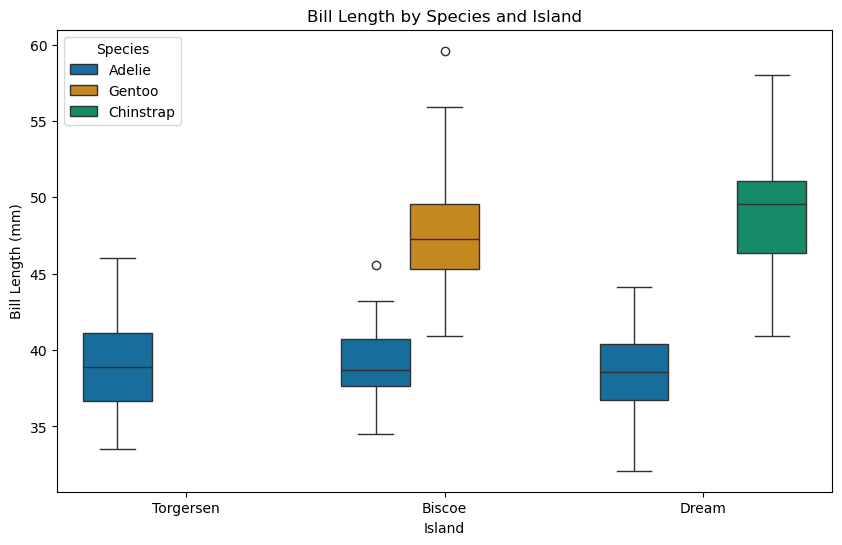

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['island'], y=df['bill_length_mm'], hue='species', data=df, palette='colorblind')

plt.title('Bill Length by Species and Island')
plt.xlabel('Island')
plt.ylabel('Bill Length (mm)')
plt.legend(title='Species')
plt.show()

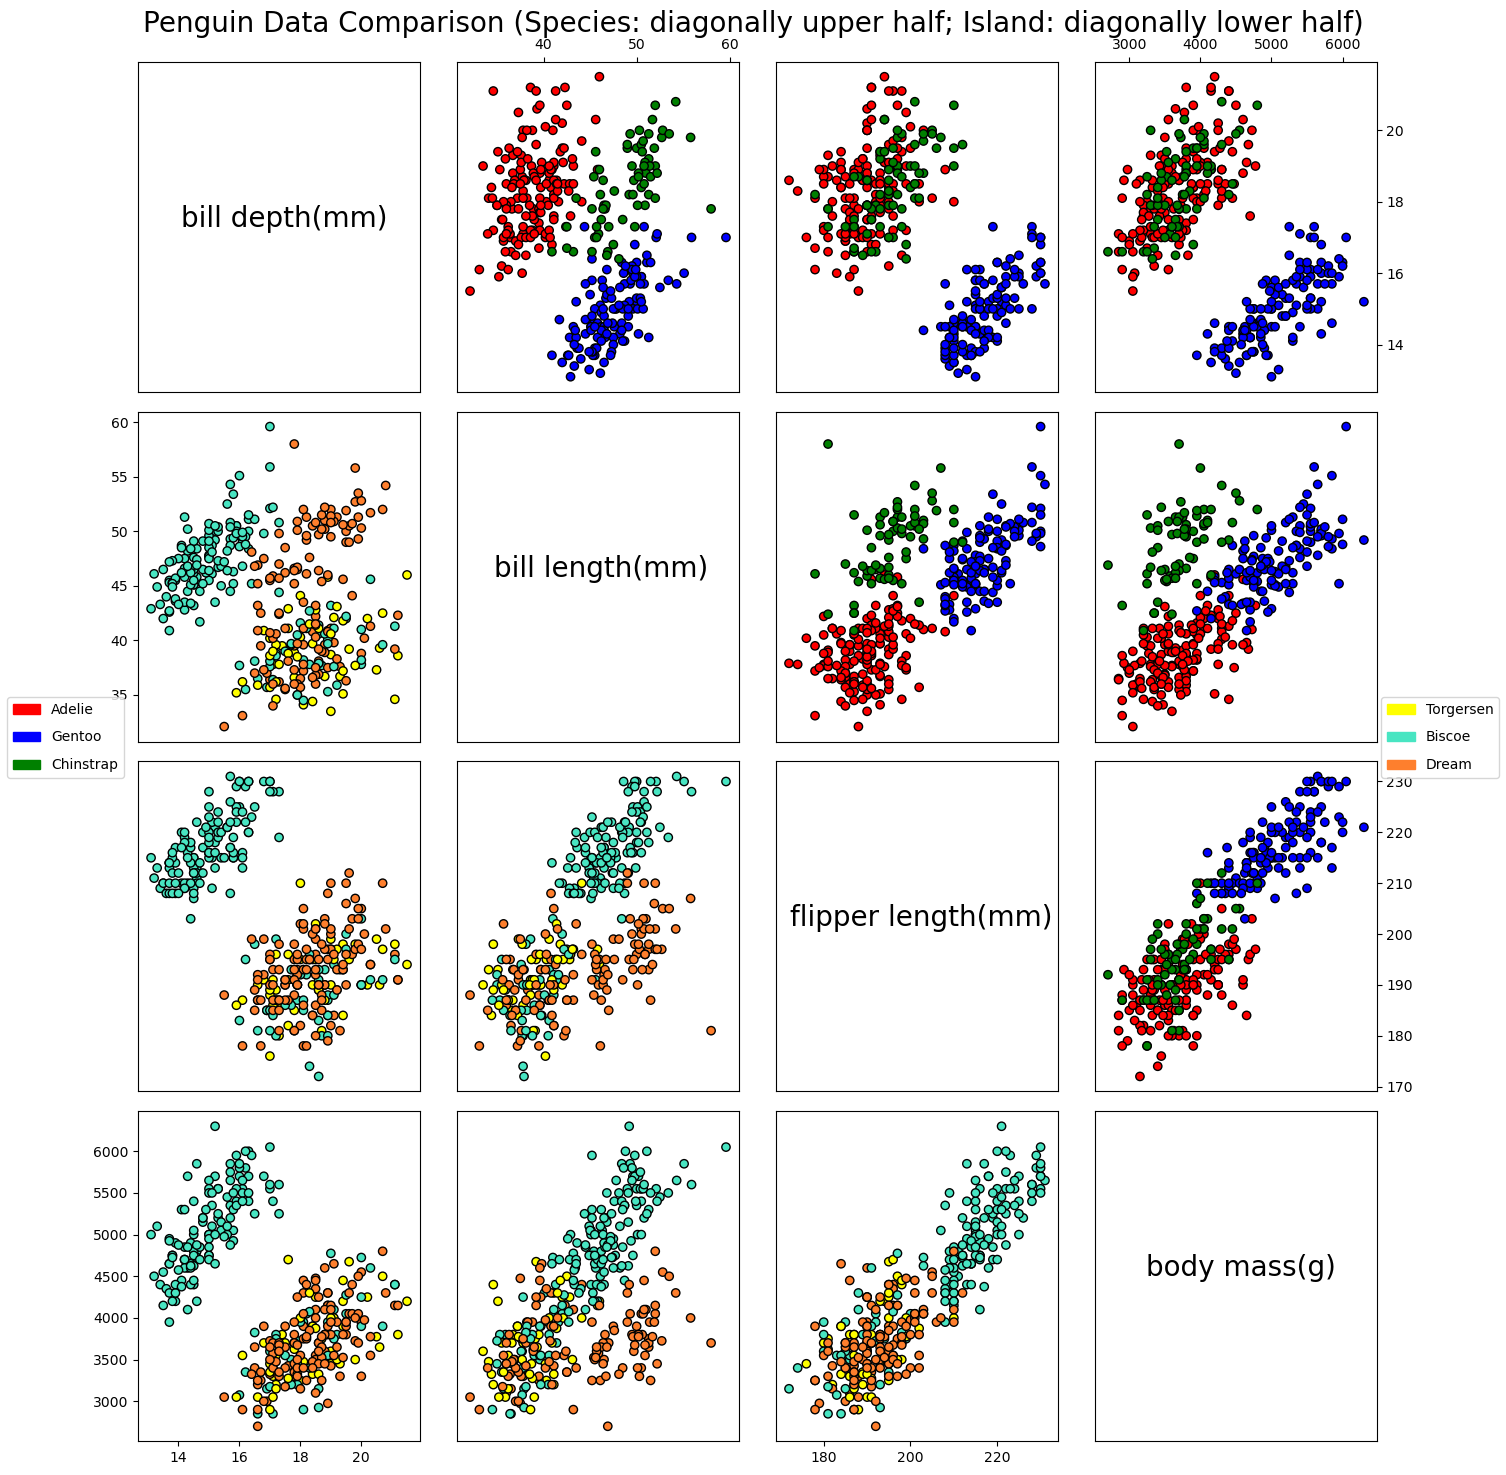

In [13]:
plt.figure(figsize=(15, 15))
nrows, ncols = 4, 4
species_c = np.where(df["species"]=="Adelie",'red', np.where(df["species"]=="Gentoo", "blue", "green"))
island_c = np.where(df["island"]=="Torgersen",'yellow', np.where(df["island"]=="Biscoe", "#48e5c2", "#fe7f2d"))

# x bill_length_mm y bill_depth_mm based on species
ax01 = plt.subplot(nrows, ncols, 2)
#c = np.where(df["species"]=="Adelie",'red', np.where(df["species"]=="Gentoo", "blue", "green"))
ax01.scatter(x=df[BILLLENGTH], y=df[BILLDEPTH], c=species_c, edgecolors='black')

# y bill_length_mm x bill_depth_mm based on islands
ax10 = plt.subplot(nrows, ncols, 5)
ax10.scatter(x=df[BILLDEPTH], y=df[BILLLENGTH], c=island_c, edgecolors='black')


# x flipper_length_mm y bill_depth_mm based on species
ax02 = plt.subplot(nrows, ncols, 3, sharey=ax01)
ax02.scatter(x=df[FLIPERLENGTH], y=df[BILLDEPTH], c=species_c, edgecolors='black')

# y flipper_length_mm x bill_depth_mm based on islands
ax20 = plt.subplot(nrows, ncols, 9, sharex=ax10)
ax20.scatter(x=df[BILLDEPTH], y=df[FLIPERLENGTH], c=island_c, edgecolors='black')

# x body_mass_g y bill_depth_mm based on species
ax03 = plt.subplot(nrows, ncols, 4, sharey=ax01)
ax03.scatter(x=df[BODYMASS], y=df[BILLDEPTH], c=species_c, edgecolors='black')

# y body_mass_g x bill_depth_mm based on locations
ax30 = plt.subplot(nrows, ncols, 13, sharex=ax20)
ax30.scatter(x=df[BILLDEPTH], y=df[BODYMASS], c=island_c, edgecolors='black')

# x flipper_length_mm y bill_length_mm based on species
ax12 = plt.subplot(nrows, ncols, 7, sharex=ax02, sharey=ax10)
ax12.scatter(x=df[FLIPERLENGTH], y=df[BILLLENGTH], c=species_c, edgecolors='black')

# y flipper_length_mm x bill_length_mm based on locations
ax21 = plt.subplot(nrows, ncols, 10, sharex=ax01, sharey=ax20)
ax21.scatter(x=df[BILLLENGTH], y=df[FLIPERLENGTH], c=island_c, edgecolors='black')


# x body_mass_g y bill_depth_mm based on species
ax13 = plt.subplot(nrows, ncols, 8, sharex=ax03, sharey=ax10)
ax13.scatter(x=df[BODYMASS], y=df[BILLLENGTH], c=species_c, edgecolors='black')

# y body_mass_g x bill_depth_mm based on locations
ax31 = plt.subplot(nrows, ncols, 14, sharex=ax01, sharey=ax30)
ax31.scatter(x=df[BILLLENGTH], y=df[BODYMASS], c=island_c, edgecolors='black')

# x body_mass_g y bill_depth_mm based on species
ax23 = plt.subplot(nrows, ncols, 12, sharex=ax03, sharey=ax20)
ax23.scatter(x=df[BODYMASS], y=df[FLIPERLENGTH], c=species_c, edgecolors='black')

# y body_mass_g x bill_depth_mm based on locations
ax32 = plt.subplot(nrows, ncols, 15, sharex=ax02, sharey=ax30)
ax32.scatter(x=df[FLIPERLENGTH], y=df[BODYMASS], c=island_c, edgecolors='black')



ax00 = plt.subplot(nrows, ncols, 1)
ax00.annotate(text="bill depth(mm)", xy=(0.15, 0.5), fontsize=20)

ax11 = plt.subplot(nrows, ncols, 6)
ax11.annotate(text="bill length(mm)", xy=(0.13, 0.5), fontsize=20)

ax22 = plt.subplot(nrows, ncols, 11)
ax22.annotate(text="flipper length(mm)", xy=(0.05, 0.5), fontsize=20)

ax33 = plt.subplot(nrows, ncols, 16)
ax33.annotate(text="body mass(g)", xy=(0.18, 0.5), fontsize=20)

#ax31.set_yticks([])
#ax32.set_yticks([])
axlist = [[ax00, ax01, ax02, ax03], 
          [ax10, ax11, ax12, ax13], 
          [ax20, ax21, ax22, ax23], 
          [ax30, ax31, ax32, ax33]]
    
for i in range(len(axlist)):
    for j in range(len(axlist[i])):
        axlist[i][j].tick_params(labelbottom=False, bottom=False, labelleft=False, left=False, labelsize=10)
        # setTitle(axlist[i][j], f"{i}{j}")
        # if (i>j):
        #     axlist[i][j].set_facecolor("black")
        # elif (i==j):
        #     axlist[i][j].set_facecolor("grey")
        # else:
        #     axlist[i][j].set_facecolor("white")
ax01.tick_params(labeltop=True, top=True)
ax03.tick_params(labelright=True, right=True, labeltop=True, top=True)
ax32.tick_params(labelbottom=True, bottom=True)
ax10.tick_params(labelleft=True, left=True)
ax23.tick_params(labelright=True, right=True)
ax30.tick_params(labelleft=True, left=True, labelbottom=True, bottom=True)

species_patches = [
    mpatches.Patch(color='red', label='Adelie'),
    mpatches.Patch(color='blue', label='Gentoo'),
    mpatches.Patch(color='green', label='Chinstrap')
]
location_patches = [
    mpatches.Patch(color='yellow', label='Torgersen'),
    mpatches.Patch(color='#48e5c2', label='Biscoe'),
    mpatches.Patch(color='#fe7f2d', label='Dream')
]

# Adding legends outside of the subplots
plt.figlegend(handles=species_patches, loc="center left", ncol=1, labelspacing=1)
plt.figlegend(handles=location_patches, loc="center right", ncol=1, labelspacing=1)

# Add captions on both sides of the figure.
# plt.figtext(0.6, 0.98, 'Your Left Caption Here', va='top', rotation='horizontal', fontsize=15)
# plt.figtext(0.25, 0.02, 'Your Right Caption Here', va='baseline', rotation='horizontal', fontsize=15)

plt.suptitle("Penguin Data Comparison (Species: diagonally upper half; Island: diagonally lower half)", fontsize=20)

# Your existing code to adjust tick parameters and set layout goes here ...

plt.tight_layout(rect=(0.05, 0, 0.95, 1))  # Adjust the rect to make room for the legends and captions
plt.savefig('img_with_legends_and_captions.png')
plt.show()